In [1]:
import numpy as np
import pandas as pd

In [2]:
ori_df=pd.read_csv('../data/crime/2016crime.csv', encoding = 'euc-kr')

In [3]:
tmp_df = pd.pivot_table(ori_df,
                       columns = ['죄종'],
                       index=['구분'],
                       values=['건수'])
tmp_df.head(2)

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  304.0  25.0  3.0  1783.5  2216.0
강동  156.0  13.5  4.5  1328.0  2365.5

In [4]:
df1 = ori_df[ori_df['발생검거'] == '발생']

tmp_df1 = pd.pivot_table( df1,
                        columns = ['죄종'],
                        index=['구분'],
                        values=['건수'])

newCol ={
    "강간":'강간 발생',
    "강도":'강도 발생',
    "살인":'살인 발생',
    "절도":'절도 발생',
    "폭력":'폭력 발생'
}
tmp_df1.rename(columns=newCol, inplace=True)
tmp_df1.head(2)

건수                            
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생
구분                                   
강남  339.0  24.0   3.0  2438.0  2336.0
강동  160.0  14.0   4.0  1754.0  2530.0

In [5]:
df2 = ori_df[ori_df['발생검거'] == '발생']

tmp_df2 = pd.pivot_table( df2,
                        columns = ['죄종'],
                        index=['구분'],
                        values=['건수'])

newCol ={
    "강간":'강간 검거',
    "강도":'강도 검거',
    "살인":'살인 검거',
    "절도":'절도 검거',
    "폭력":'폭력 검거'
}
tmp_df2.rename(columns=newCol, inplace=True)
tmp_df2.head(2)

건수                            
죄종  강간 검거 강도 검거 살인 검거   절도 검거   폭력 검거
구분                                   
강남  339.0  24.0   3.0  2438.0  2336.0
강동  160.0  14.0   4.0  1754.0  2530.0

In [6]:
# 데이터 병합(tmp_df1, tmp_df2 병합을 한다. 어느방향?)
# 행방향으로 병합
# 두개의 데이터가 같은 형태(shape)을 가지고 있다
# 2015년도 데이터와 동일 형태를 원한다. 따라서, concat를 통한 단순 합치기

tmp = pd.concat([tmp_df1, tmp_df2], axis=1)
tmp.head(2)

건수                                                               
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생  강간 검거 강도 검거 살인 검거   절도 검거   폭력 검거
구분                                                                      
강남  339.0  24.0   3.0  2438.0  2336.0  339.0  24.0   3.0  2438.0  2336.0
강동  160.0  14.0   4.0  1754.0  2530.0  160.0  14.0   4.0  1754.0  2530.0

In [7]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
(건수, 강간 발생)    31 non-null float64
(건수, 강도 발생)    31 non-null float64
(건수, 살인 발생)    31 non-null float64
(건수, 절도 발생)    31 non-null float64
(건수, 폭력 발생)    31 non-null float64
(건수, 강간 검거)    31 non-null float64
(건수, 강도 검거)    31 non-null float64
(건수, 살인 검거)    31 non-null float64
(건수, 절도 검거)    31 non-null float64
(건수, 폭력 검거)    31 non-null float64
dtypes: float64(10)
memory usage: 2.7+ KB


In [8]:
# pandas 데이터프레임의 값 파트 변경 작업
# int 8bit : -128 ~127
# int 16bit: 30000
tmp = tmp.astype(np.int32)
tmp.head(2)

건수                                                      
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생 강간 검거 강도 검거 살인 검거 절도 검거 폭력 검거
구분                                                            
강남   339    24     3  2438  2336   339    24     3  2438  2336
강동   160    14     4  1754  2530   160    14     4  1754  2530

In [9]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
(건수, 강간 발생)    31 non-null int32
(건수, 강도 발생)    31 non-null int32
(건수, 살인 발생)    31 non-null int32
(건수, 절도 발생)    31 non-null int32
(건수, 폭력 발생)    31 non-null int32
(건수, 강간 검거)    31 non-null int32
(건수, 강도 검거)    31 non-null int32
(건수, 살인 검거)    31 non-null int32
(건수, 절도 검거)    31 non-null int32
(건수, 폭력 검거)    31 non-null int32
dtypes: int32(10)
memory usage: 1.5+ KB


In [10]:
# 컬럼명 2015년도 자료 기준으로 대체 혹은 수정
# 해보니, 컬럼명이 동일해서 문제가 발생 -> 병합전에 수정 처리

newCol ={
    "강간":'강간 발생',
    "강도":'강도 발생',
    "살인":'살인 발생',
    "절도":'절도 발생',
    "폭력":'폭력 발생'
}
tmp.rename(columns=newCol, inplace=True)
tmp.head(2)

건수                                                      
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생 강간 검거 강도 검거 살인 검거 절도 검거 폭력 검거
구분                                                            
강남   339    24     3  2438  2336   339    24     3  2438  2336
강동   160    14     4  1754  2530   160    14     4  1754  2530

In [11]:
# 중간값 저장 (시작 데이터 저장)

tmp.to_csv('../data/crime/2016_start.csv', sep=',', encoding='euc-kr')

In [12]:
# 특정 행부터 데이터를 가져온다

crime_per_police=pd.read_csv('../data/crime/2016_start.csv', sep=',', encoding='euc-kr', header=1)

crime_per_police.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
0,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남,339.0,24.0,3.0,2438.0,2336.0,339.0,24.0,3.0,2438.0,2336.0


In [13]:
crime_per_police.drop([0], inplace=True)
crime_per_police.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
1,강남,339.0,24.0,3.0,2438.0,2336.0,339.0,24.0,3.0,2438.0,2336.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,160.0,14.0,4.0,1754.0,2530.0


In [14]:
# 특정 컬럼을 인덱스로 설정

crime_per_police.set_index('죄종', inplace=True)
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,339.0,24.0,3.0,2438.0,2336.0
강동,160.0,14.0,4.0,1754.0,2530.0,160.0,14.0,4.0,1754.0,2530.0


In [15]:
# 타입 보정
crime_per_police=crime_per_police.astype(np.int32)

In [16]:
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339,24,3,2438,2336,339,24,3,2438,2336
강동,160,14,4,1754,2530,160,14,4,1754,2530


In [17]:
crime_per_police.columns

Index(['강간 발생', '강도 발생', '살인 발생', '절도 발생', '폭력 발생', '강간 검거', '강도 검거', '살인 검거',
       '절도 검거', '폭력 검거'],
      dtype='object')

In [18]:
crime_per_police.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='죄종')

In [19]:
# 검색어를 던져서 응답 데이터 중에 주소, 위도, 경도, 질의어 리턴함수

import requests
KAKAO_API_KEY = '706958df16ad00f2174dc54d1cbac3a8'

def netGetGeocode( query ):
    url = '''
        https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format(query)
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    } 
    res = requests.get( url, headers=headers )
    res = res.json()
    
    d1 = res['documents'][0]['address_name']
    d2 = res['documents'][0]['y']
    d3 = res['documents'][0]['x']
    d4 = res['documents'][0]['place_name']
    
    return d1, d2, d3, d4

In [20]:
print(netGetGeocode)

<function netGetGeocode at 0x000002BFBE4AFF78>


In [21]:
netGetGeocode('서울')

('서울 영등포구 당산동3가 385-1', '37.5263671784869', '126.896278443881', '영등포구청')

In [22]:
# 반복해서 관할서의 이름을 완성하여 출력하시오
# 진행율
# 

!pip install tqdm

In [23]:
import time
import requests
from tqdm import tqdm_notebook

In [59]:
# 데이터를 담는 자료형
police_station_info = []

# 경찰서 이름 개수 만큼 반복
for name in tqdm_notebook(crime_per_police.index):
    # 검색어 획득
    query = '서울%s경찰서' % name
    print('서울%s경찰서' % name)
    police_station_info.append(netGetGeocode(query))
    time.sleep(0.5)
    
police_station_info

서울강남경찰서
서울강동경찰서
서울강북경찰서
서울강서경찰서
서울관악경찰서
서울광진경찰서
서울구로경찰서
서울금천경찰서
서울남대문경찰서
서울노원경찰서
서울도봉경찰서
서울동대문경찰서
서울동작경찰서
서울마포경찰서
서울방배경찰서
서울서대문경찰서
서울서부경찰서
서울서초경찰서
서울성동경찰서
서울성북경찰서
서울송파경찰서
서울수서경찰서
서울양천경찰서
서울영등포경찰서
서울용산경찰서
서울은평경찰서
서울종로경찰서
서울종암경찰서
서울중랑경찰서
서울중부경찰서
서울혜화경찰서



[('서울 강남구 대치동 998', '37.5093899463715', '127.067070541137', '서울강남경찰서'),
 ('서울 강동구 성내동 541-1', '37.5286763457485', '127.126894359114', '서울강동경찰서'),
 ('서울 강북구 번동 415-15', '37.637408362838', '127.027340967017', '강북경찰서'),
 ('서울 강서구 화곡동 980-27',
  '37.5513470867979',
  '126.849886071842',
  '서울강서경찰서(2020년예정)'),
 ('서울 관악구 봉천동 1695-5', '37.4745875338795', '126.951062346192', '서울관악경찰서'),
 ('서울 광진구 구의동 254-32', '37.54292164557882', '127.08396170505674', '서울광진경찰서'),
 ('서울 구로구 구로동 436', '37.4948844667899', '126.886660285169', '서울구로경찰서'),
 ('서울 금천구 시흥동 산 189', '37.45725314643252', '126.89674921449215', '서울금천경찰서'),
 ('서울 중구 남대문로5가 567', '37.55478043476484', '126.97349729923079', '서울남대문경찰서'),
 ('서울 노원구 하계동 250', '37.6423345266253', '127.071404832413', '서울노원경찰서'),
 ('서울 도봉구 창동 17', '37.6533976253312', '127.052708256522', '서울도봉경찰서'),
 ('서울 동대문구 청량리동 229', '37.5850804205685', '127.045762797538', '서울동대문경찰서'),
 ('서울 동작구 노량진동 72-35', '37.5131469479959', '126.942857105642', '서울동작경찰서'),
 ('서울 마포구 아현동 618-1',

In [61]:
# 위도만 추출해서 리스트로 출력 -> df에 컬럼 삽입을 해야 하므로

lat = []
for station in police_station_info:
    # print(station[1])
    lat.append(station[1])
lat

['37.5093899463715',
 '37.5286763457485',
 '37.637408362838',
 '37.5513470867979',
 '37.4745875338795',
 '37.54292164557882',
 '37.4948844667899',
 '37.45725314643252',
 '37.55478043476484',
 '37.6423345266253',
 '37.6533976253312',
 '37.5850804205685',
 '37.5131469479959',
 '37.5510118582052',
 '37.48155944749938',
 '37.5649023404956',
 '37.60215667958602',
 '37.4956126696023',
 '37.5617947420747',
 '37.58989767143614',
 '37.5019775317251',
 '37.4934972653425',
 '37.5165549067037',
 '37.52585220719',
 '37.5411811395942',
 '37.6285242467996',
 '37.5755413947569',
 '37.602095614954',
 '37.6182390801576',
 '37.5636199296203',
 '37.5718915247338']

In [62]:
# 리스트 내포
# 전에 하던것과 동일
# addrs, lats, lngs, names 준비

addrs = [station[0] for station in police_station_info]
lats  = [station[1] for station in police_station_info]
lngs  = [station[2] for station in police_station_info]
names = [station[3] for station in police_station_info]

In [63]:
crime_per_police.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
죄종,,,,,,,,,,,
강남,339,24,3,2438,2336,339,24,3,2438,2336,NaN
강동,160,14,4,1754,2530,160,14,4,1754,2530,NaN
강북,217,5,7,1222,2778,217,5,7,1222,2778,NaN
강서,275,10,9,1952,3204,275,10,9,1952,3204,강서구
관악,322,12,6,2103,3235,322,12,6,2103,3235,NaN


In [64]:
# crime_per_police 정보에 자치구 정보가 없다 -> 자치구:xx구 데이터 추가
# arrds -> 구를 획득

tmp_gu = []
for addr in addrs:
        # 분해
        tmp_gu.append(addr.split()[1])
        
# 리스트 내포
tmp_gu = [addr.split()[1] for addr in addrs if addr]
# crime_per_police['자치구'] = [....]


In [65]:
# 데이터보정 (해당 분야의 지식이 잇을경우 유리( 보정사항 체크하기에))
# 금천 -> 관악구 -> 금천구 대체, 수행
# 강서 -> 양천구 -> 강서구 대체
# 표현이 복잡해짐
# crime_per_police[crime_per_police['자치구'] =='양천구']
crime_per_police.loc['강서', '자치구'] ='강서구'
crime_per_police.loc['금천', '자치구'] ='금천구'


In [66]:
print(len(crime_per_police['자치구'].unique()))
crime_per_police

3


,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
죄종,,,,,,,,,,,
강남,339,24,3,2438,2336,339,24,3,2438,2336,NaN
강동,160,14,4,1754,2530,160,14,4,1754,2530,NaN
강북,217,5,7,1222,2778,217,5,7,1222,2778,NaN
강서,275,10,9,1952,3204,275,10,9,1952,3204,강서구
관악,322,12,6,2103,3235,322,12,6,2103,3235,NaN
광진,279,11,4,2636,2392,279,11,4,2636,2392,NaN
구로,273,10,9,1910,3164,273,10,9,1910,3164,NaN
금천,175,7,6,1264,2193,175,7,6,1264,2193,금천구
남대문,57,5,1,946,890,57,5,1,946,890,NaN


In [67]:
# 데이터 저장 crime_analysis_midsave.csv

crime_per_police.to_csv('../data/crime/crime_analysis_midsave.csv', sep=',', encoding='euc-kr')

In [68]:
crime_per_police_raw = pd.read_csv('../data/crime/crime_analysis_midsave.csv', sep=',', encoding='euc-kr')

In [69]:
# 피벗 테이블을 이용하여 '자치구' 기준으로 데이터를 정리하시오
# 행이 총 25개가 나와야 함

crime_anal = pd.pivot_table(crime_per_police_raw, index='자치구', aggfunc=np.sum)

In [70]:
len(crime_anal.index)

2

In [71]:
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
강서구,275,275,10,10,9,9,1952,1952,3204,3204
금천구,175,175,7,7,6,6,1264,1264,2193,2193


In [72]:
# 검거율 = 검거/발생*100
# 5대 범죄에 대한 검거율을 각각 추가한다
# 수치가 100% 넘는 데이터는 원천 ㄴ통계 데이터의 이전년도 누락분이 예상됨

crime_anal['폭력 검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100
crime_anal['절도 검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['살인 검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['강도 검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['강간 검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,폭력 검거율,절도 검거율,살인 검거율,강도 검거율,강간 검거율
자치구,,,,,,,,,,,,,,,
강서구,275,275,10,10,9,9,1952,1952,3204,3204,100.0,100.0,100.0,100.0,100.0
금천구,175,175,7,7,6,6,1264,1264,2193,2193,100.0,100.0,100.0,100.0,100.0


In [37]:
# 검거 컬럼을 모두 제거

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['절도 검거']
del crime_anal['살인 검거']
del crime_anal['폭력 검거']

In [57]:
crime_anal.head()

,강간,강도,살인,절도,폭력,폭력 검거율,절도 검거율,살인 검거율,강도 검거율,강간 검거율
자치구,,,,,,,,,,
강서구,275,10,9,1952,3204,100.0,100.0,100.0,100.0,100.0
금천구,175,7,6,1264,2193,100.0,100.0,100.0,100.0,100.0


In [39]:
# 전년도 데이터가 실수(의도) 들어가서 100을 초과하는 데이터(검거율) ->100 일괄
# 사건 발생 년도와 검거년도가 달라서 나오는 오류 가능성

target_col = ['폭력 검거율','살인 검거율','절도 검거율','강도 검거율','강간 검거율']

# tmp = crime_anal.copy()

for col in target_col:
    crime_anal.loc[crime_anal[col]>100, col]=100
    
crime_anal.head(2)
    

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력 검거율,절도 검거율,살인 검거율,강도 검거율,강간 검거율
자치구,,,,,,,,,,
강서구,275,10,9,1952,3204,100.0,100.0,100.0,100.0,100.0
금천구,175,7,6,1264,2193,100.0,100.0,100.0,100.0,100.0


In [40]:
crime_anal.rename(columns={'폭력 발생':'폭력',
                            '절도 발생':'절도',
                            '살인 발생':'살인',
                            '강도 발생':'강도',
                            '강간 발생':'강간'}, inplace=True)

In [41]:
# 데이터 조정 작업

In [42]:
# 파이선의 머신러닝에 있는 전처리 도구를 사용 최대,최소값을 
from sklearn import preprocessing

In [43]:
# crime_anal.columns
col = ['강간', '강도', '살인', '절도', '폭력']

# 대상 칼럼의 데이터 획득
x = crime_anal[col].values

# 전처리 모듈의 최대최소 스캐너 함수
min_max_scaler = preprocessing.MinMaxScaler()

#min_max_scaler(float값) 함수 사용 데이터 받음
x_scaled = min_max_scaler.fit_transform(x)

In [44]:
# 데이터 프레임 생성
crime_anal_normal = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
crime_anal_normal.head()

,강간,강도,살인,절도,폭력
자치구,,,,,
강서구,1.0,1.0,1.0,1.0,1.0
금천구,0.0,0.0,0.0,0.0,0.0


In [45]:
# 컬럼 추가를 1개각 아닌 5개를 동시에 처리하는 표현 
crime_anal_normal[target_col] = crime_anal[target_col]
crime_anal_normal.head()
# 단순 비교를 위해서만 정규화를 한개 아니라 => 시각화를 위해도 목적이 있다.

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율
자치구,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0


In [46]:
result_CCTV=pd.read_csv('../data/crime/cctv_pop_analysis_result.csv', index_col='자치구', encoding = 'utf-8')

In [47]:
#
#
#
#

crime_anal_normal[['CCTV', '인구수']]=result_CCTV[['소계', '인구수']]
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율,CCTV,인구수
자치구,,,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0,911,606981
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,1348,252752


In [48]:
# 발생건수 합산 -> 범죄 추가
# col 을 사용
# 해당 컬럼의 값들을 획득-> 행방향 합산값 -> 컬럼추가

crime_anal_normal['범죄'] = np.sum(crime_anal_normal[col], axis=1)
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율,CCTV,인구수,범죄
자치구,,,,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0,911,606981,5.0
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,1348,252752,0.0


In [49]:
# 검거율 총계 -> 컬럼명 "검거율, target_col

crime_anal_normal['검거율'] = np.sum(crime_anal_normal[target_col], axis=1)
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0,911,606981,5.0,500.0
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,1348,252752,0.0,500.0


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline
from matplotlib import font_manager, rc

In [51]:
#한글처리모든 방법 한번에 찾는 코드
plt.rcParams['axes.unicode_minus']=False
if platform.system()=='Darwin':#맥
    font_list_mac=fm.OSXInstalledFonts()
    rc('font',family='Applegothic')
elif platform.system()=='Linux':#리눅스
    rc('font',family='NanumGothic')
elif platform.system()=='Windows':#윈도우
    #폰트 차후 확인
#     fontPath = 'C:\Windows\Fonts'
#     fontName=font_manager.fontProperties(fname=fontPath).get_name()
    rc('font',family='NanumGothic')
else:
    print('알수없는 시스템.미적용')

In [52]:
rc('font',family='NanumGothic')


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matp

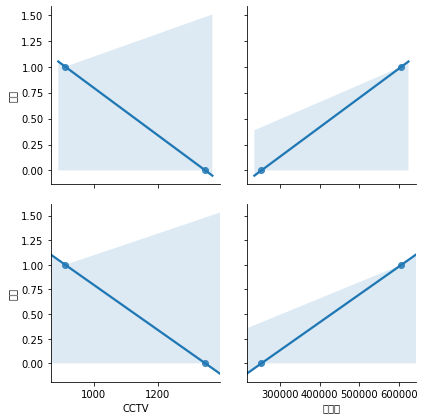

In [53]:
# 100% 데이터들 때문에 관계성 파일이 불가함
sns.pairplot(crime_anal_normal,
            x_vars=['CCTV', '인구수'],
            y_vars=['강도', '살인'],
            kind='reg', height=3)
plt.show()

In [54]:
# 검거율 최고값 100이라고 한정하고 나머지 정렬
tmp_max=crime_anal_normal['검거율'].max()
crime_anal_normal['검거율']=crime_anal_normal['검거율']/tmp_max*100

In [55]:
crime_anal_normal_sort=crime_anal_normal.sort_values(by='검거율', ascending=True)
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0,911,606981,5.0,100.0
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,1348,252752,0.0,100.0


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51208 missing from c

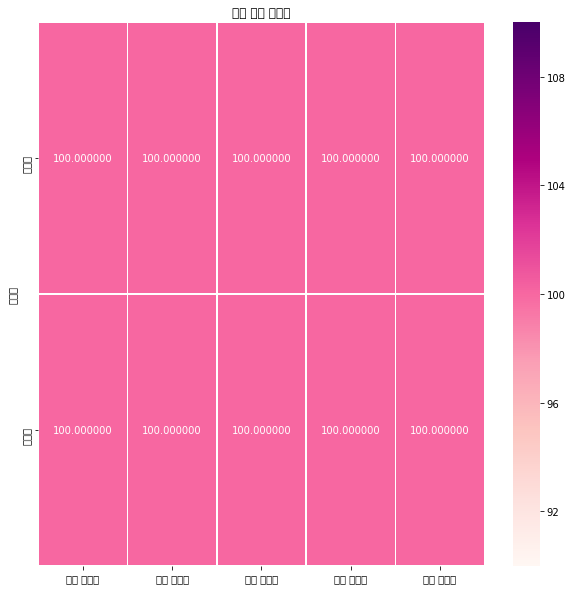

In [56]:
# 검거 기준 정렬:

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_normal_sort[target_col],
           annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 검거 비율표')
plt.show()

In [73]:
#
col

['강간', '강도', '살인', '절도', '폭력']

In [74]:
crime_anal_normal['범죄']=crime_anal_normal['범죄']/5
crime_anal_normal_sort=crime_anal_normal.sort_values(by='범죄', ascending=True)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)


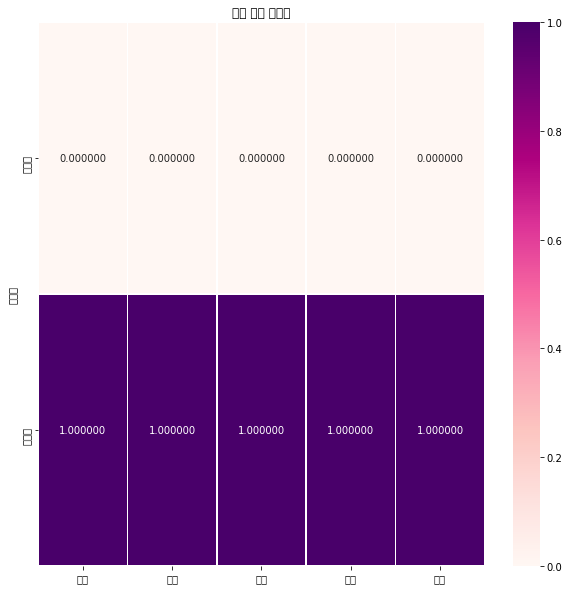

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_normal_sort[col],
           annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 발생 비율표')
plt.show()

In [76]:
# 데이터 저장
crime_anal_normal

,강간,강도,살인,절도,폭력,폭력 검거율,살인 검거율,절도 검거율,강도 검거율,강간 검거율,CCTV,인구수,범죄,검거율
자치구,,,,,,,,,,,,,,
강서구,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0,911,606981,1.0,100.0
금천구,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,1348,252752,0.0,100.0


## 지도 시각화

In [82]:
import json
geo_json='../data/crime/seoul_gu.json'
geo_seoul_gu = json.load(open(geo_json, encoding='utf-8'))
# print(geo_seoul_gu)

In [81]:
import folium

In [83]:
crime_anal_normal = pd.read_csv('../data/crime/crime_mid.csv', encoding=)

SyntaxError: invalid syntax (<ipython-input-83-41b3aeb127e6>, line 1)

In [79]:
crime_anal_normal.set_index('자치구', inplace=True)

KeyError: "None of ['자치구'] are in the columns"

In [86]:
map = folium.Map(location=[37.5542692, 126.9665101], zoom_size=10)

# 자치구별
map.choropleth(geo_data=geo_seoul_gu,
              data=crime_anal_normal['범죄'], 
                   columns=[
                      crime_anal_normal.index, crime_anal_normal['범죄']
                      ],
                  key_on='feature.id',
                  fill_color=YlGn,
                  legend_name='자치구별 범죄 발생 비율'
              )


NameError: name 'YlGn' is not defined

In [87]:
# 인구대비 범죄 비율시각화, 백만명 기준
tmp_pop_crime_rate=crime_anal_normal['범죄']/crime_anal_normal['범죄']*1000000

map = folium.Map(location=[37.5542692, 126.9665101], zoom_size=10)

# 자치구별
map.choropleth(geo_data=geo_seoul_gu,
              data=tmp_pop_crime_rate, 
              columns=[
                       crime_anal_normal.index, 
                       tmp_pop_crime_rate
                      ],
              key_on='feature.id',
              fill_color='PuRd',
              legend_name='인구대비 범죄율(백만명기준)'
              )


C:\Users\admin\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [88]:
crime_per_police_raw.head()

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339,24,3,2438,2336,339,24,3,2438,2336,NaN
1,강동,160,14,4,1754,2530,160,14,4,1754,2530,NaN
2,강북,217,5,7,1222,2778,217,5,7,1222,2778,NaN
3,강서,275,10,9,1952,3204,275,10,9,1952,3204,강서구
4,관악,322,12,6,2103,3235,322,12,6,2103,3235,NaN


In [89]:
crime_per_police_raw['lat'] = lats
crime_per_police_raw['lng'] = lngs

In [92]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng
0,강남,339,24,3,2438,2336,339,24,3,2438,2336,NaN,37.5093899463715,127.067070541137
1,강동,160,14,4,1754,2530,160,14,4,1754,2530,NaN,37.5286763457485,127.126894359114


In [96]:
col = ['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거']
tmp = crime_per_police_raw[col]/crime_per_police_raw[col].max()
crime_per_police_raw['검거']=np.sum(tmp, axis=1)
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng,검거
0,강남,339,24,3,2438,2336,339,24,3,2438,2336,NaN,37.5093899463715,127.067070541137,3.655433
1,강동,160,14,4,1754,2530,160,14,4,1754,2530,NaN,37.5286763457485,127.126894359114,2.661577


In [ ]:
map = folium.Map(location=[37.5542692, 126.9665101], zoom_size=11)

for idx in crime_per_police_raw.index:
    folium.Marker([float(crime_per_police_raw['lat'][idx]),
                  float(crime_per_police_raw['lng'][idx])],
     popup='서울%s경찰서'%crime_per_police_raw['죄종'][idx]).add_to(map)
    
map

In [107]:
map = folium.Map(location=[37.5542692, 126.9665101], zoom_size=11)

for idx in crime_per_police_raw.index:
    gps=[float(crime_per_police_raw['lat'][idx]),
         float(crime_per_police_raw['lng'][idx])]
    folium.Marker(gps, 
                  popup='서울%s경찰서'%crime_per_police_raw['죄종'][idx]
                 ).add_to(map)
    folium.CircleMarker(gps, 
                        radius=crime_per_police_raw['검거'][idx]*10,
                        color='#547544',
                        fill_color='#333333'
                       ).add_to(map)
    
map